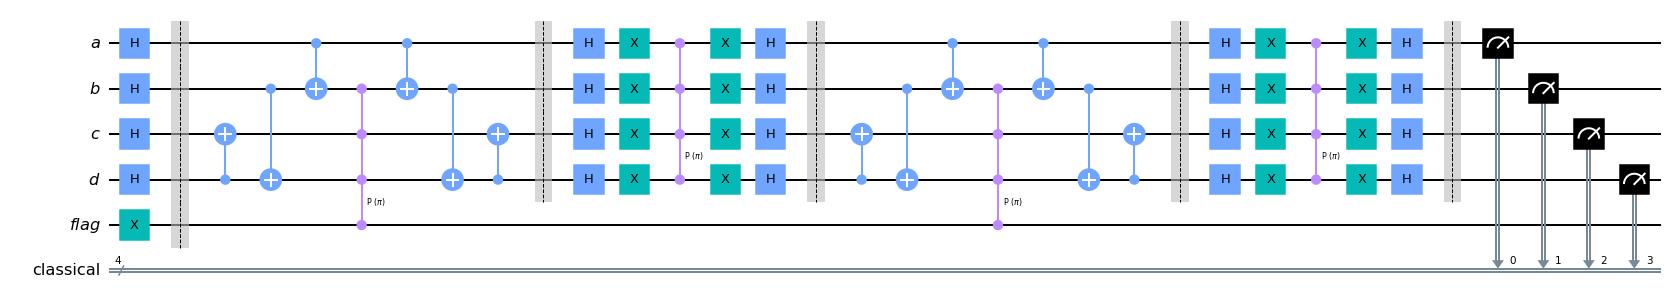

In [1]:
from qiskit import *
from numpy import pi
import numpy as np
from qiskit.circuit.library import C3XGate
from qiskit.algorithms import Grover

num_iterations = Grover.optimal_num_iterations(2, 4)
a = QuantumRegister(1, "a")
b = QuantumRegister(1, "b")
c = QuantumRegister(1, "c")
d = QuantumRegister(1, "d")
flag = QuantumRegister(1, "flag")
creg_c = ClassicalRegister(4, "classical")
circuit = QuantumCircuit(a, b, c, d, flag, creg_c)

circuit.h(a)
circuit.h(b)
circuit.h(c)
circuit.h(d)
circuit.x(flag)
circuit.barrier(a, b, c, d, flag)
for i in range(2):
    circuit.cx(d, c)
    circuit.cx(b, d)
    circuit.cx(a, b)
    circuit.mcp(np.pi, [b, c, d], flag)
    circuit.cx(a, b)
    circuit.cx(b, d)
    circuit.cx(d, c)
    circuit.barrier(a, b, c, d)
    circuit.h(a)
    circuit.h(b)
    circuit.h(c)
    circuit.h(d)
    circuit.x(d)
    circuit.x(a)
    circuit.x(b)
    circuit.x(c)
    circuit.mcp(np.pi, [a, b, c], d)
    circuit.x(d)
    circuit.x(c)
    circuit.x(b)
    circuit.x(a)
    circuit.h(d)
    circuit.h(c)
    circuit.h(b)
    circuit.h(a)
    circuit.barrier(a, b, c, d)

circuit.measure(a, creg_c[0])
circuit.measure(b, creg_c[1])
circuit.measure(c, creg_c[2])
circuit.measure(d, creg_c[3])
circuit.draw(output="mpl", fold=-1)

In [2]:
from mqt import ddsim

backend = ddsim.DDSIMProvider().get_backend("qasm_simulator")
job = execute(circuit, backend, shots=10000000)
counts = job.result().get_counts(circuit)

/Users/nils/miniforge3/envs/tf3/lib/python3.9/site-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/nils/miniforge3/envs/tf3/lib/python3.9/site-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


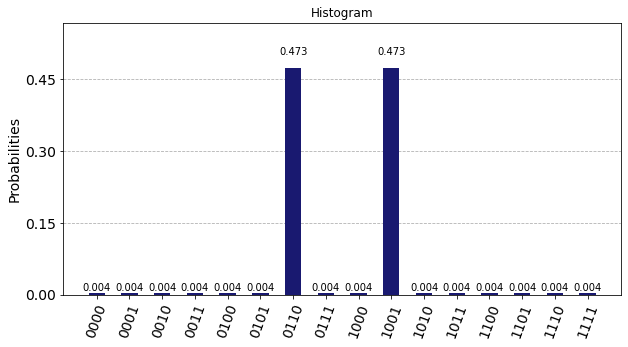

In [3]:
from qiskit.visualization import plot_histogram

plot_histogram(counts, color="midnightblue", title="Histogram", figsize=(10, 5))

In [4]:
iterations = Grover.optimal_num_iterations(num_solutions=2, num_qubits=4)
iterations

2